# LOGISTIC, DECISION TREE, RANDOM FOREST,ADABOOST AND GRADIENT BOOST - HEART ATTACK

About data set
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack

Attribute Information
1) age
2) sex
3) chest pain type (4 values)
4) resting blood pressure
5) serum cholestoral in mg/dl
6)fasting blood sugar > 120 mg/dl
7) resting electrocardiographic results (values 0,1,2)
8) maximum heart rate achieved
9) exercise induced angina
10) oldpeak = ST depression induced by exercise relative to rest
11)the slope of the peak exercise ST segment
12) number of major vessels (0-3) colored by flourosopy
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14) target: 0= less chance of heart attack 1= more chance of heart attack

Dataset is taken for learning purpose. Source of the data : https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data =pd.read_csv('D:/DECODER/projects file/heart.csv')

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.isnull().sum()



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:xlabel='sex', ylabel='count'>

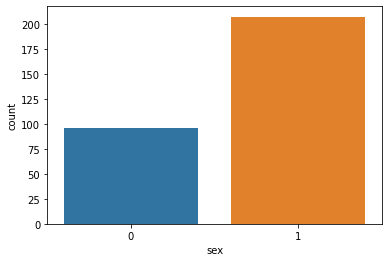

In [6]:
sns.countplot(data.sex)

<AxesSubplot:xlabel='cp', ylabel='count'>

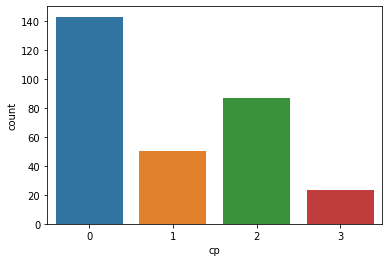

In [7]:
sns.countplot(data.cp)

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
corr=data.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

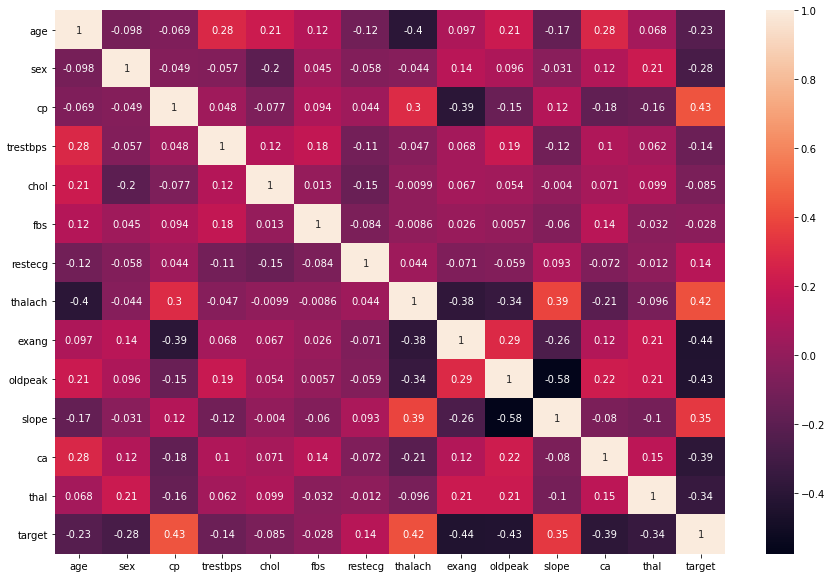

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
plt.show

In [11]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
feature_columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [13]:
target=["target"]

In [14]:
x=data[feature_columns]
y=data[target]

In [15]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [16]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [17]:
from sklearn.model_selection import train_test_split # spliting the data is train and test

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [19]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3


In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr=LogisticRegression()

In [22]:
lr.fit(x_train,y_train)

LogisticRegression()

# Predicting the model

In [23]:
y_pred=lr.predict(x_test)

In [24]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1], dtype=int64)

# Evaluation

In [25]:

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score 

In [26]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        40
           1       0.89      0.96      0.92        51

    accuracy                           0.91        91
   macro avg       0.92      0.91      0.91        91
weighted avg       0.91      0.91      0.91        91

0.9120879120879121


In [27]:
print(confusion_matrix(y_test,y_pred))


[[34  6]
 [ 2 49]]


In [28]:
print(1-metrics.accuracy_score(y_test,y_pred))

0.08791208791208793


# ROC CURVE

In [29]:
y_pred_prob = lr.predict_proba(x_test)[:,1]

In [30]:
y_pred_prob[:10]

array([0.51610997, 0.90726081, 0.93077056, 0.30109097, 0.66758042,
       0.92467267, 0.78555105, 0.00873404, 0.00718206, 0.94559181])

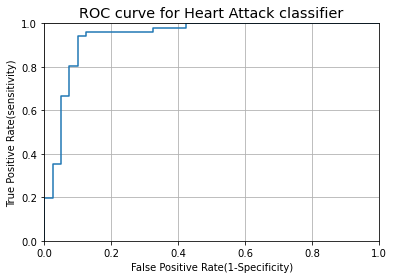

In [31]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams["font.size"] = 12
plt.title("ROC curve for Heart Attack classifier")
plt.xlabel("False Positive Rate(1-Specificity)")
plt.ylabel("True Positive Rate(sensitivity)")
plt.grid(True)

In [32]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [33]:
evaluate_threshold(0.42)

Sensitivity: 0.9607843137254902
Specificity: 0.875


In [34]:
evaluate_threshold(0.2)

Sensitivity: 0.9803921568627451
Specificity: 0.675


In [35]:
evaluate_threshold(0.4)

Sensitivity: 0.9607843137254902
Specificity: 0.875


# creating Decision Tree model

In [36]:
#Import descision tree classifier from sk learn library
from sklearn.tree import DecisionTreeClassifier

#Fitting the decession tree with default hyperparameters,apart from 
#max_depth which is 5 so that we can plot and read the tree

dt_default=DecisionTreeClassifier(max_depth=5, random_state=40)

# Fiting on Train data
dt_default.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=40)

In [37]:
#Making predictions
y_pred_default=dt_default.predict(x_test)

In [38]:
#Printing classification report
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.73      0.82      0.78        40
           1       0.85      0.76      0.80        51

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.80      0.79      0.79        91



In [39]:
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[33  7]
 [12 39]]
0.7912087912087912


# Hyper parameter using  GridSearchCV

In [40]:
#GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
#specify number of folds for k-fold CV
n_folds =5

#parameters to build model on
parameters={'max_depth':range(1,10), 'min_samples_split':range(1,8), 'ccp_alpha': [0,0.1,0.3,0.4,0.5,0.55]}

#instantiate the model
dtree=DecisionTreeClassifier(criterion='gini',random_state =40)

#fit tree on the training data
tree=GridSearchCV(dtree,parameters,cv=n_folds,scoring='accuracy')
tree.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=40),
             param_grid={'ccp_alpha': [0, 0.1, 0.3, 0.4, 0.5, 0.55],
                         'max_depth': range(1, 10),
                         'min_samples_split': range(1, 8)},
             scoring='accuracy')

In [41]:
param=tree.best_params_
param

{'ccp_alpha': 0, 'max_depth': 3, 'min_samples_split': 2}

In [42]:
tree.best_score_ # the score decreased significantly

0.7554817275747508

# creating Random Forest model

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf_default=RandomForestClassifier(max_depth=5, random_state=40)

In [45]:
rf_default.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, random_state=40)

In [46]:
print(confusion_matrix(y_test,rf_default.predict(x_test)))
print(accuracy_score(y_test,rf_default.predict(x_test)))

[[35  5]
 [ 5 46]]
0.8901098901098901


In [47]:
#GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
#specify number of folds for k-fold CV
n_folds =5

#parameters to build model on
parameters={'max_depth':range(1,10), 'min_samples_split':range(1,8), 'ccp_alpha': [0,0.1,0.3,0.4,0.5,0.55]}

#instantiate the model
RF=RandomForestClassifier(criterion='gini',random_state =40)

#fit tree on the training data
RF1=GridSearchCV(RF,parameters,cv=n_folds,scoring='accuracy')
RF1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=40),
             param_grid={'ccp_alpha': [0, 0.1, 0.3, 0.4, 0.5, 0.55],
                         'max_depth': range(1, 10),
                         'min_samples_split': range(1, 8)},
             scoring='accuracy')

In [48]:
param=RF1.best_params_
param

{'ccp_alpha': 0, 'max_depth': 9, 'min_samples_split': 7}

In [49]:
RF1.best_score_ # with hyperparameter the score decreased by 8 percent

0.8117386489479512

# creating ADABoost model

In [50]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
abc = AdaBoostClassifier()

# Train Adaboost Classifer
abc1 = abc.fit(x_train, y_train)


#Predict the response for test dataset
y_pred = abc1.predict(x_test)

In [51]:
accuracy_score(y_test, y_pred)

0.8021978021978022

In [52]:
# import Support Vector Classifier
from sklearn.svm import SVC
svc=SVC(probability=True, kernel='linear')

# import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score

# create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=10, base_estimator=svc,learning_rate=0.49, random_state=40)


# train adaboost classifer
model2 = abc.fit(x_train, y_train)


# predict the response for test dataset
y_pred1 = model2.predict(x_test)


# calculate and print model accuracy
print("Model Accuracy with SVC Base Estimator:",accuracy_score(y_test, y_pred1))

Model Accuracy with SVC Base Estimator: 0.9120879120879121


In [53]:
print(classification_report(y_test, y_pred1))  # with Adaboost the score is good

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        40
           1       0.89      0.96      0.92        51

    accuracy                           0.91        91
   macro avg       0.92      0.91      0.91        91
weighted avg       0.91      0.91      0.91        91



# creating GradientBoost model

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1,1.25]

for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 40)
    gb.fit(x_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(x_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(gb.score(x_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.830
Accuracy score (test): 0.912

Learning rate:  0.1
Accuracy score (training): 0.868
Accuracy score (test): 0.890

Learning rate:  0.25
Accuracy score (training): 0.877
Accuracy score (test): 0.879

Learning rate:  0.5
Accuracy score (training): 0.915
Accuracy score (test): 0.857

Learning rate:  0.75
Accuracy score (training): 0.925
Accuracy score (test): 0.835

Learning rate:  1
Accuracy score (training): 0.948
Accuracy score (test): 0.835

Learning rate:  1.25
Accuracy score (training): 0.934
Accuracy score (test): 0.791



In [76]:

gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.25, max_features=2, max_depth = 2, random_state = 40)
gb.fit(x_train, y_train)
predictions = gb.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print()
print("Classification Report")
print(classification_report(y_test, predictions))
accuracy_score(y_test, predictions)

Confusion Matrix:
[[34  6]
 [ 5 46]]

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.88      0.90      0.89        51

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



0.8791208791208791